<figure>
  <IMG SRC="https://raw.githubusercontent.com/mbakker7/exploratory_computing_with_python/master/tudelft_logo.png" WIDTH=25% ALIGN="right">
</figure>

<p><div> 
<br><b>Probabilistic Design</b>
<br><b>CEGM2XXX</b>
<br> <i>This course is given at the faculty of Civil Engineering and Geosciences at the Technical University of Delft</i>
<br><b>Teaching team:</b>
<br><i>- Dr. Ir. R.C.Lanzafame </i>
<br><i>- Dr. P.M. Nasarre</i>
</div>
<br>
<br><b>Notebooks created by teaching assistant:</b>
<br><i>- Siemen Algra</i>
</div>


<h2 style="color:#00BFFF;">Case study: Dependency</h2>

### Introduction:  
*-----------------------*

In [1]:
# Import local classes
import sys
sys.path.append(r'../../src/')
import bivariate.class_copula

# Import standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyvinecopulib as cop
import scipy.stats as st

<h2 style="color:#00BFFF;">Case A</h2>
- 2 lognormal distributed random variables


##### A.1. Define statistical properties of the random variables

In [2]:
# Define distributions
s = 0.198
loc = 0.000
scale = 98.058
Q_1 = st.lognorm(s=s, loc=loc, scale=scale)   # Random Variable Q_1, lognormal distribution
Q_2 = st.lognorm(s=s, loc=loc, scale=scale)   # Random Variable Q_2, lognormal distribution

##### A.2. Sample events from the random variables

In [3]:
# Generate random samples
n = 10000 # Number of samples

Q_1_samples = Q_1.rvs(size=n)    # Generate n samples from scipy instance Q_1, defined in cell above
Q_2_samples = Q_2.rvs(size=n)    # Generate n samples from scipy instance Q_2, defined in cell above

# Combine marginal sample lists into a combined list
Q_combined_samples = np.array([Q_1_samples, Q_2_samples]).T

##### A.3. Assign sampled events to Region of Interest class

In [4]:
# Create an instance of the Region_of_interest class, by assigning the combined samples as an attribute
# This allows to perform operation, such as plotting
Q_class_A = bivariate.class_copula.Region_of_interest(random_samples=Q_combined_samples)

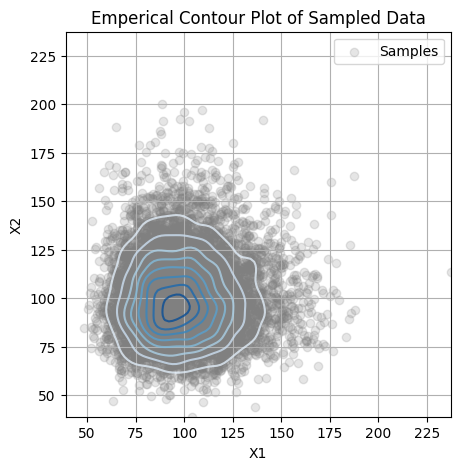

In [5]:
# Plot the emperical contours of the random samples
Q_class_A.plot_emperical_contours(bandwidth=4)

##### A.4. Define function for the region of interest

In [6]:
# Define reliability analysis function
def maximum_discharge_function(X1,X2, X3):
    X3.ppf(0.95) 
    Q_max = 275.0
    function = (X1 + X2 - Q_max >= 0)
    return function

In [7]:
# Assign the function to the class instance
Q_class_A.function =  maximum_discharge_function

##### A.5. Perform reliability analysis

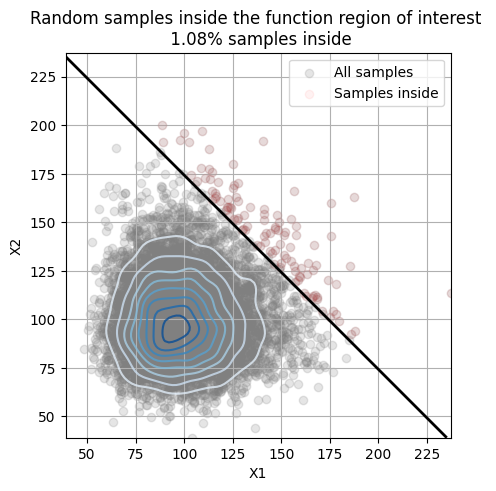

In [8]:
# Run the function needed to check if the points are inside the region of interest
Q_class_A.inside_function()

# Plot the points inside the region of interest
Q_class_A.plot_inside_function();

<h2 style="color:#00BFFF;">Case B</h2>
- 2 normal distributed random variables


##### B.1. Define statistical properties of the random variables

In [9]:
# Define distributions
loc = 135
scale = 20
Q_1_B = st.norm(loc=loc, scale=scale)   # Random Variable Q_1_B, normal distribution
Q_2_B = st.norm(loc=loc, scale=scale)   # Random Variable Q_2_B, normal distribution

##### B.2. Sample events from the random variables

In [10]:
# Generate random samples
Q_1_B_samples = Q_1_B.rvs(size=n)    # Generate n samples from scipy instance Q_1, defined in cell above
Q_2_B_samples = Q_2_B.rvs(size=n)    # Generate n samples from scipy instance Q_2, defined in cell above

# Combine marginal sample lists into a combined list
Q_B_combined_samples = np.array([Q_1_B_samples, Q_2_B_samples]).T

##### B.3. Assign sampled events to Region of Interest class

In [11]:
# Create an instance of the Region_of_interest class, by assigning the combined samples as an attribute
# This allows to perform operation, such as plotting
Q_class_B = bivariate.class_copula.Region_of_interest(random_samples=Q_B_combined_samples)

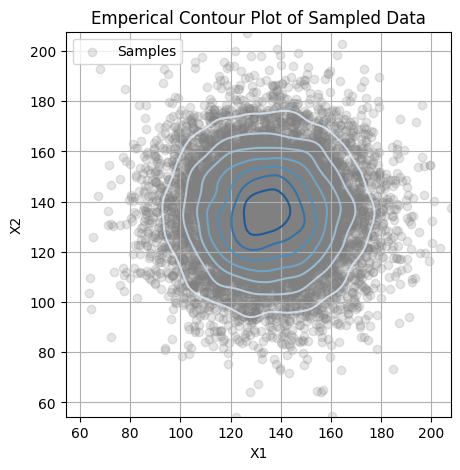

In [12]:
# Plot the emperical contours of the random samples
Q_class_B.plot_emperical_contours(bandwidth=4)

##### B.4. Assign function for the region of interest

In [13]:
# Assign the function to the class instance
Q_class_B.function = maximum_discharge_function

##### B.5. Perform reliability analysis

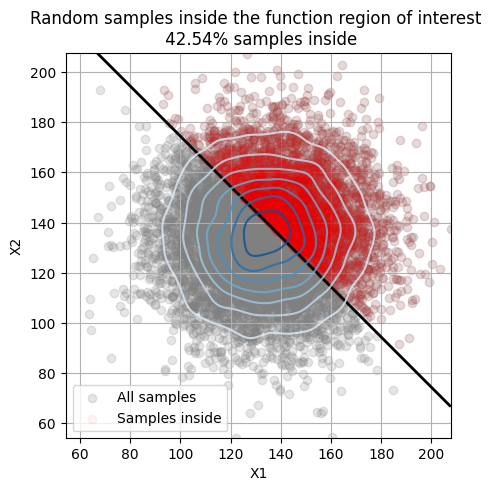

In [14]:
# Run the function needed to check if the points are inside the region of interest
Q_class_B.inside_function()

# Plot the points inside the region of interest
Q_class_B.plot_inside_function();

<h2 style="color:#00BFFF;">Case C</h2>
- Bivariate Gaussian distributed random variables


##### C.1. Define statistical properties of the bivariate gaussian distribution

In [15]:
# Define distributions
mean = [155, 125]                       # Mean of the distributions
covariance = [[20, -1], [-1, 100]]   # Covariance matrix of the distributions

Q_combined_C = st.multivariate_normal(mean=mean, cov=covariance)

##### C.2. Sample events from the random variables

In [16]:
# Generate random samples
Q_combined_C_samples = Q_combined_C.rvs(size=n)    # Generate n samples from scipy instance Q_combined_C, defined in cell above

##### C.3. Assign sampled events to Region of Interest class

In [17]:
# Create an instance of the Region_of_interest class, by assigning the combined samples as an attribute
# This allows to perform operation, such as plotting
Q_class_C = bivariate.class_copula.Region_of_interest(random_samples=Q_combined_C_samples)

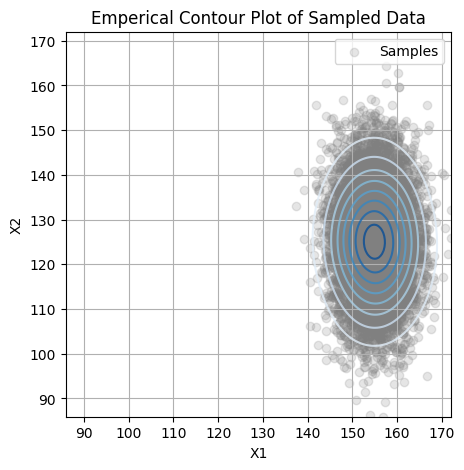

In [18]:
# Plot the emperical contours of the random samples
Q_class_C.plot_emperical_contours(bandwidth=5)

##### C.4. Assign function for the region of interest

In [19]:
# Assign the function to the class instance
Q_class_C.function = maximum_discharge_function

##### C.5. Perform reliability analysis

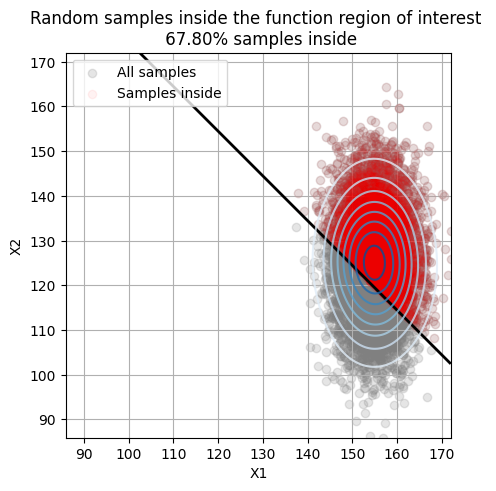

In [20]:
# Run the function needed to check if the points are inside the region of interest
Q_class_C.inside_function()

# Plot the points inside the region of interest
Q_class_C.plot_inside_function();

<h2 style="color:#00BFFF;">Case D</h2>
- Copula based dependency, Gaussian copula, with lognormal and gumbel marginal distributions


##### D.1. Define statistical properties of the copula and the marginal distributions

In [21]:
# Create distributions for 2 random variables, Q_1 and Q_2
s = 0.198
loc = 0.000
scale = 98.058

Q_1_D = st.lognorm(s=s, loc=loc, scale=scale)      # Normal distribution with mean 0 and standard deviation 1
Q_2_D = st.gumbel_l(loc=100, scale=15)      # Gumbel distribution with location 0 and scale 1


# Create a copula object
Copula_12 = cop.Bicop(family=cop.BicopFamily.gaussian, parameters = [0.6])

For the copula another class is used, the `Copula` class. 

In [22]:
# Define a bivariate copula object
Q_combined_D_copula_object = bivariate.class_copula.Bivariate([Q_1_D,Q_2_D], Copula_12)

##### D.2. Sample events from the Copula

In [23]:
# Generate random samples from the bivariate copula object
Q_combined_D_samples = Q_combined_D_copula_object.random_samples(10000)

##### D.3. Assign sampled events to Region of Interest class

In [24]:
# Assign the combined samples list to the Region_of_interest class
# This allows to perform operation, such as plotting
Q_class_D = bivariate.class_copula.Region_of_interest(random_samples=Q_combined_D_samples)

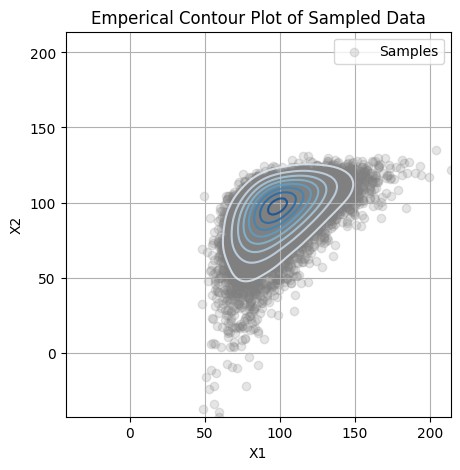

In [25]:
# Plot the emperical contours of the random samples
Q_class_D.plot_emperical_contours(bandwidth=7)

##### D.4. Assign function for the region of interest

In [26]:
# Assign the function to the class instance
Q_class_D.function = maximum_discharge_function

##### D.5. Perform reliability analysis

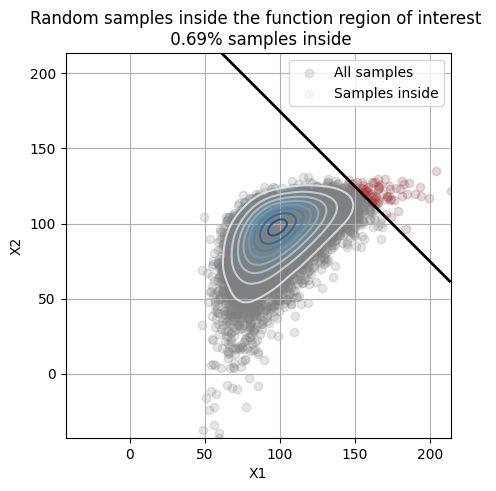

In [27]:
# Run the function needed to check if the points are inside the region of interest
Q_class_D.inside_function()

# Plot the points inside the region of interest
Q_class_D.plot_inside_function();